In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Constants

teams = [
    'Arizona Cardinals',
    'Atlanta Falcons',
    'Baltimore Ravens',
    'Buffalo Bills',
    'Carolina Panthers',
    'Chicago Bears',
    'Cincinnati Bengals',
    'Cleveland Browns',
    'Dallas Cowboys',
    'Denver Broncos',
    'Detroit Lions',
    'Green Bay Packers',
    'Houston Texans',
    'Indianapolis Colts',
    'Jacksonville Jaguars',
    'Kansas City Chiefs',
    'Las Vegas Raiders',
    'Los Angeles Chargers',
    'Los Angeles Rams',
    'Miami Dolphins',
    'Minnesota Vikings',
    'New England Patriots',
    'New Orleans Saints',
    'New York Giants',
    'New York Jets',
    'Philadelphia Eagles',
    'Pittsburgh Steelers',
    'San Francisco 49ers',
    'Seattle Seahawks',
    'Tampa Bay Buccaneers',
    'Tennessee Titans',
    'Washington Commanders'
]

train_years = [2015, 2016, 2017, 2018, 2019, 2020]
test_years = [2021, 2022]


In [15]:


X_train = pd.read_csv('/Users/jarrettsung/Documents/GitHub/NFL-Win-Prediction-Project/CSVs/new_train_data_with_avgs.csv')

y_train = X_train['Playoff']

X_test = pd.read_csv('/Users/jarrettsung/Documents/GitHub/NFL-Win-Prediction-Project/CSVs/new_test_data_with_avgs.csv')

y_test = X_test['Playoff']

In [16]:
# Assuming your DataFrame is named 'df'
# Replace 'YourFeatureColumns' with the actual feature columns you want to use for training

# Step 1: Preprocess the data
X_train = X_train.drop(["Playoff", 'Team', 'Year', 'Win_Percentage', 'Total_Rest_Days'], axis = 1)
X_test = X_test.drop(["Playoff", 'Team', 'Year', 'Win_Percentage', 'Total_Rest_Days'], axis = 1)

# Use LabelEncoder to convert categorical labels into numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Step 3: Train the logistic regression model
model = LogisticRegressionCV(max_iter=1000)  # You can adjust parameters as needed
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


# Step 6: Convert predictions back to original strings
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

'''
# Step 8: Print true class and predicted class for each sample
for true_class, pred_class in zip(y_test_original, y_pred_original):
    print(f'True Class: {true_class}, Predicted Class: {pred_class}')
'''


[4 5 5 5 5 4 1 1 5 5 5 5 2 0 5 5 4 1 5 5 5 5 1 5 5 5 5 5 5 1 0 3 4 5 5 4 3
 5 5 4 5 4 4 5 5 5 5 1 5 5 4 2 4 5 0 0 5 4 1 4 1 5 5 5]
[0 5 5 5 5 5 5 2 1 5 5 5 5 5 5 4 1 1 5 5 4 5 4 0 2 5 4 5 5 5 5 5 5 4 5 4 4
 5 5 5 5 5 5 5 5 5 5 1 5 1 5 1 5 5 3 5 5 5 5 5 5 4 5 5 5 5 1 0 5 5 0 0 4 1
 5 4 1 5 5 5 5 1 5 4 5 5 0 5 5 5 1 1 4 0 3 2 5 4 5 5 5 5 5 5 5 1 5 5 5 5 4
 2 5 1 5 4 5 5 5 5 4 5 0 5 1 5 0 3 2 3 4 5 5 5 1 0 4 1 5 4 5 5 5 5 5 5 5 5
 5 5 5 5 3 1 4 5 1 0 1 5 5 4 5 5 5 5 2 5 1 1 5 4 1 4 5 5 5 5 5 3 5 5 1 5 0
 4 4 5 5 5 5 4]


In [23]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/jarrettsung/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ValueError: multiclass format is not supported

In [6]:
# Print the mapping between labels and integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'ConfChamp': 0, 'Division': 1, 'SuperBowl': 2, 'SuperBowlW': 3, 'WildCard': 4, nan: 5}
ConfChamp: 0
Division: 1
SuperBowl: 2
SuperBowlW: 3
WildCard: 4
nan: 5


In [8]:
# Step 7: Evalueate Model
accuracy = accuracy_score(y_test, y_pred)
#conf_matrix = confusion_matrix(y_test_original, y_pred_original)

# Step 8: Print Results
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix (with string labels):\n{conf_matrix}')


Test Set Accuracy: 0.546875


In [9]:
# Mapping Teams to Table

x_teams = np.repeat(teams, 2)
years = np.resize([2021, 2022], 64)

dict = {'Team' : x_teams,
        'Year' : years,
        'Predicted Wins' : y_pred_original,
        'Actual Wins': y_test_original}
df_projections = pd.DataFrame(dict)

df_projections = pd.DataFrame(dict)

print(df_projections.head())

df_projections.to_csv('Playoffs.csv')
!cp Playoffs.csv "/content/drive/Shared drives/M148Project/Logistics/Playoffs.csv"


                Team  Year Predicted Wins Actual Wins
0  Arizona Cardinals  2021            NaN    WildCard
1  Arizona Cardinals  2022            NaN         NaN
2    Atlanta Falcons  2021            NaN         NaN
3    Atlanta Falcons  2022            NaN         NaN
4   Baltimore Ravens  2021       Division         NaN
cp: /content/drive/Shared drives/M148Project/Logistics/Playoffs.csv: No such file or directory


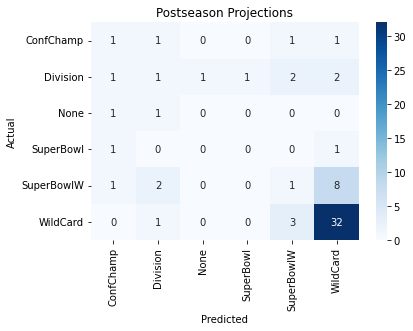

In [10]:
# Heat Map

qualified_labels = ['ConfChamp', 'Division', 'None', 'SuperBowl', 'SuperBowlW', 'WildCard']

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=qualified_labels, yticklabels=qualified_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Postseason Projections')
plt.show()


In [17]:
## github dataset
standings = pd.read_csv("http://www.habitatring.com/standings.csv")
standings.sort_values(by='season')
standings = standings[(standings['season'] >= 2015) & (standings['season'] <= 2022)]
sos_train = standings[(standings['season'] >= 2015) & (standings['season'] <= 2020)]
sos_test = standings[(standings['season'] >= 2021) & (standings['season'] <= 2022)]


In [20]:
# List of team abbreviations
team_abbreviations = [
    'BUF', 'MIA', 'NE', 'NYJ', 'BAL', 'CIN', 'CLE', 'PIT',
    'HOU', 'IND', 'JAX', 'TEN', 'DEN', 'KC', 'OAK', 'SD',
    'DAL', 'NYG', 'PHI', 'WAS', 'CHI', 'DET', 'GB', 'MIN',
    'ATL', 'CAR', 'NO', 'TB', 'ARI', 'SEA', 'SF', 'STL',
    'LA', 'LAC', 'LV'
]

# List of full team names
teams2 = [
    'Buffalo Bills', 'Miami Dolphins', 'New England Patriots', 'New York Jets',
    'Baltimore Ravens', 'Cincinnati Bengals', 'Cleveland Browns', 'Pittsburgh Steelers',
    'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars', 'Tennessee Titans',
    'Denver Broncos', 'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers',
    'Dallas Cowboys', 'New York Giants', 'Philadelphia Eagles', 'Washington Commanders',
    'Chicago Bears', 'Detroit Lions', 'Green Bay Packers', 'Minnesota Vikings',
    'Atlanta Falcons', 'Carolina Panthers', 'New Orleans Saints', 'Tampa Bay Buccaneers',
    'Arizona Cardinals', 'Seattle Seahawks', 'San Francisco 49ers', 'Los Angeles Rams',
    'Los Angeles Rams', 'Los Angeles Chargers', 'Las Vegas Raiders'
]

# Create a dictionary with "abbreviation": "full team name" format
team_mapping = dict(zip(team_abbreviations, teams2))

TypeError: 'dict' object is not callable

In [21]:
# Update "Team" column in X_train using the mapping
sos_train["team"] = sos_train["team"].map(team_mapping)

NameError: name 'team_mapping' is not defined

In [ ]:
# Update "Team" column in X_test using the mapping
sos_test["team"] = sos_test["team"].map(team_mapping)
sos_test.head()

,season,conf,division,team,wins,losses,ties,pct,div_rank,scored,allowed,net,sov,sos,seed,playoff


In [ ]:
X_train.head()

,Team,Year,Total_Rest_Days,Total_Distance_Traveled,Total_Points_For,Total_Points_Allowed,Total_Yards,Rush_Yards,Pass_Yards,Total_Opp_Yards,...,Pass_YDs_Per_game,Opp_Yds_Per_Game,Opp_Rush_Yds_Per_game,Opp_Pass_Yds_Per_game,PD,Yds_DIff,PD_Per_Game,Yds_Diff_Per_Game,Playoff,SOS
0,Arizona Cardinals,2015,122 days,11709.954940,489,313,6533,1917,4616,5147,...,288.5000,321.6875,91.2500,230.4375,176.0,1386.0,11.0000,86.6250,ConfChamp,None
1,Arizona Cardinals,2016,122 days,10602.459040,418,362,5868,1732,4136,4883,...,258.5000,305.1875,94.8750,210.3125,56.0,985.0,3.5000,61.5625,None,None
2,Arizona Cardinals,2017,122 days,10284.258790,295,361,5026,1386,3640,4973,...,227.5000,310.8125,89.5000,221.3125,-66.0,53.0,-4.1250,3.3125,None,None
3,Arizona Cardinals,2018,122 days,7852.459252,225,425,3865,1342,2523,5741,...,157.6875,358.8125,154.9375,203.8750,-200.0,-1876.0,-12.5000,-117.2500,None,None
4,Arizona Cardinals,2019,122 days,10868.190350,361,442,5467,1990,3477,6432,...,217.3125,402.0000,120.1250,281.8750,-81.0,-965.0,-5.0625,-60.3125,None,None


In [ ]:
## Adding the sos variable to X_train
X_train['SOS'] = None
for index, row in X_train.iterrows():
  X_train.at[index, "SOS"] = sos_train[(sos_train["team"] == row["Team"]) & (sos_train["season"] == row["Year"])]["sos"].values[0]

In [ ]:
## Adding the sos variable to X_train
X_test['SOS'] = None
for index, row in X_test.iterrows():
  X_test.at[index, "SOS"] = sos_test[(sos_test["team"] == row["Team"]) & (sos_test["season"] == row["Year"])]["sos"].values[0]

IndexError: ignored

In [ ]:
X_train.head()

,Team,Year,Total_Rest_Days,Total_Distance_Traveled,Total_Points_For,Total_Points_Allowed,Total_Yards,Rush_Yards,Pass_Yards,Total_Opp_Yards,...,Pass_YDs_Per_game,Opp_Yds_Per_Game,Opp_Rush_Yds_Per_game,Opp_Pass_Yds_Per_game,PD,Yds_DIff,PD_Per_Game,Yds_Diff_Per_Game,Playoff,SOS
0,Arizona Cardinals,2015,122 days,11709.954940,489,313,6533,1917,4616,5147,...,288.5000,321.6875,91.2500,230.4375,176.0,1386.0,11.0000,86.6250,ConfChamp,0.472656
1,Arizona Cardinals,2016,122 days,10602.459040,418,362,5868,1732,4136,4883,...,258.5000,305.1875,94.8750,210.3125,56.0,985.0,3.5000,61.5625,None,0.457031
2,Arizona Cardinals,2017,122 days,10284.258790,295,361,5026,1386,3640,4973,...,227.5000,310.8125,89.5000,221.3125,-66.0,53.0,-4.1250,3.3125,None,0.488281
3,Arizona Cardinals,2018,122 days,7852.459252,225,425,3865,1342,2523,5741,...,157.6875,358.8125,154.9375,203.8750,-200.0,-1876.0,-12.5000,-117.2500,None,0.523438
4,Arizona Cardinals,2019,122 days,10868.190350,361,442,5467,1990,3477,6432,...,217.3125,402.0000,120.1250,281.8750,-81.0,-965.0,-5.0625,-60.3125,None,0.527344


In [ ]:
X_train.head()
X_train.to_csv('/content/drive/Shared drives/M148Project/CSVs/new_train_data_with_avgs.csv', index=False)
